## Project to create a map with each bike rack in Davidson County

In [1]:
from shapely.geometry import Point   #This is to pull Point module (could import ,Line after Point if wanted)
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
racks = gpd.read_file('../data/Bike Racks (GIS).geojson')  #Using gpd geopandas to read in the file
print(racks.crs)
racks.head( )

{'init': 'epsg:4326'}


,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)


In [4]:
racks.crs = "EPSG:4326"
print(racks.crs)

EPSG:4326


In [6]:
county = gpd.read_file('../data/Davidson County Border (GIS).geojson')  #Using gpd geopandas to read in the file
print(county.crs)
county.head( )

{'init': 'epsg:4326'}


,area_sq_mi,objectid,shape_area,shape_len,geometry
0,525,4,14641027913.6,686109.334953,"MULTIPOLYGON (((-86.52704 36.13598, -86.52914 ..."
1,0,3,675823.52,3786.70930403,"MULTIPOLYGON (((-86.52315 36.13876, -86.52288 ..."


In [7]:
county.crs = "EPSG:4326"
print(county.crs)

EPSG:4326


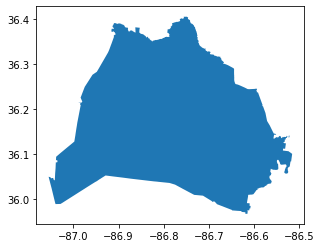

In [10]:
county.plot();

In [23]:
#To create map of Nashville to start with, found coordinates online by Google search.
county_map = folium.Map(location = [36.174465, -86.767960])
county_map

In [34]:
for row_index, row_values in racks.iterrows():
    print('index is', row_index)
    print('values are:')
    print(' ')
    print(row_values)
    print('--------------------')

index is 0
values are:
 
detail_loc                           Hickory Hollow Mall
quantity                                               1
location                                            Mall
domain                                            Public
idnumber                                             113
objectid                                               1
status                                          Existing
lon                                       -86.6554527779
type                                                Rack
data_colle                                   Health Dept
lat                                        36.0499277778
capacity                                              12
geometry      POINT (-86.65545277788499 36.049927777764)
Name: 0, dtype: object
--------------------
index is 1
values are:
 
detail_loc    Stones River Greenway - Donelson/Hermitage Area
quantity                                                    2
location                                 

detail_loc                      Centennial Park/Parthenon
quantity                                                1
location                                             Park
domain                                             Public
idnumber                                              161
objectid                                              119
status                                           Existing
lon                                        -86.8131578083
type                                                 Rack
data_colle                                    Health Dept
lat                                         36.1502053796
capacity                                                5
geometry      POINT (-86.8131578083302 36.15020537962005)
Name: 118, dtype: object
--------------------
index is 119
values are:
 
detail_loc                            Fannie Mae Dees Park
quantity                                                 1
location                                              P

detail_loc                Smithson Craighead Middle School
quantity                                                 1
location                                     Middle School
domain                                              Public
idnumber                                               240
objectid                                               247
status                                            Existing
lon                                         -86.7816611116
type                                                  Rack
data_colle                                     Health Dept
lat                                          36.2347222223
capacity                                                52
geometry      POINT (-86.78166111161954 36.23472222234469)
Name: 246, dtype: object
--------------------
index is 247
values are:
 
detail_loc            Smithson Craighead Elementary School
quantity                                                 0
location                                 E

index is 381
values are:
 
detail_loc    Health Department - South WIC Nutritional Center
quantity                                                     0
location                                         Health Center
domain                                                  Public
idnumber                                                   400
objectid                                                   382
status                                         Future Artistic
lon                                             -86.7362588141
type                                                      Rack
data_colle                                               Civic
lat                                              36.0937282617
capacity                                                     0
geometry           POINT (-86.73625881414266 36.0937282616504)
Name: 381, dtype: object
--------------------
index is 382
values are:
 
detail_loc                                     Sevier Park
quantity              

# Start here tomorrow. Ask for help in fixing this error. 

### Also, was the above step necessary? Seems to work okay, so that's good at least.

In [36]:
#Step 1: Create county_map (same as above, with zoom adjusted)
county_map = folium.Map(location = [36.174465, -86.767960], zoom_start = 12)  

#Step 2: Use iterrrows to iterate through the rows and get a point for each bike rack.
#Define loc (location), then pop (popup), then use both to place markers
for row_index, row_values in racks.iterrows():
    loc = [row_values['lat'], row_values['lon']]
    pop = str[row_values['detail_loc']]
    marker = folium.Marker(
        location = loc,
        popup = pop)
    
#Step 3: add marker to county map, and save resulting map.
    marker.add_to(county_map)
county_map.save('../maps/map_racks.html')  #This tells it where to save the finished map

county_map

TypeError: 'type' object is not subscriptable